<a href="https://colab.research.google.com/github/Applied-Energetic/Applied-Energetic/blob/main/testtensor0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新段落

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
cd /home/

/home


In [ ]:
pwd

'/home'

In [3]:
!nvidia-smi


Wed Jun  9 02:28:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

三、注意事项、使用技巧
1、使用云端硬盘保存数据
直接使用colab时可以上传临时数据，保存临时结果，一旦断开连接，数据将会丢失，所以强烈建议使用云端硬盘保存数据。

2、断开连接解决办法
在使用Colab时，一段时间挂机未操作有可能导致连接断开，但是要是想跑时间较长的项目时不可能一直盯着屏幕，解决办法如下：
在浏览器中按F12，找到console将下面代码粘贴到控制台回车即可。
若刷新了页面请重新执行上述步骤

function ClickConnect(){
  colab.config
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End");
};
setInterval(ClickConnect, 60000)
1
2
3
4
5
6
7
3、运行时间过长的项目
Colab使用时间过长也有几率会掉线，对执行时间过长的项目来说，建议保存中间结果，下次使用时可以直接读取中间结果继续跑，持续白嫖。

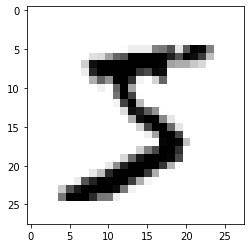

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_[0], cmap="binary")
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
import tensorflow as tf
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

#import tensorflow.examples.tutorials.mnist.input_data as input_data
#from tensorflow.examples.tutorials.mnist import input_data

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf
class Network:
    def __init__(self):
        # 学习速率，一般在 0.00001 - 0.5 之间
        self.learning_rate = 0.001

        # 输入张量 28 * 28 = 784个像素的图片一维向量
        self.x = tf.placeholder(tf.float32, [None, 784])

        # 标签值，即图像对应的结果，如果对应数字是8，则对应label是 [0,0,0,0,0,0,0,0,1,0]
        # 这种方式称为 one-hot编码
        # 标签是一个长度为10的一维向量，值最大的下标即图片上写的数字
        self.label = tf.placeholder(tf.float32, [None, 10])

        # 权重，初始化全 0
        self.w = tf.Variable(tf.zeros([784, 10]))
        # 偏置 bias， 初始化全 0
        self.b = tf.Variable(tf.zeros([10]))
        # 输出 y = softmax(X * w + b)
        self.y = tf.nn.softmax(tf.matmul(self.x, self.w) + self.b)

        # 损失，即交叉熵，最常用的计算标签(label)与输出(y)之间差别的方法
        self.loss = -tf.reduce_sum(self.label * tf.log(self.y + 1e-10))

        # 反向传播，采用梯度下降的方法。调整w与b，使得损失(loss)最小
        # loss越小，那么计算出来的y值与 标签(label)值越接近，准确率越高
        self.train = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(self.loss)

        # 以下代码验证正确率时使用
        # argmax 返回最大值的下标，最大值的下标即答案
        # 例如 [0,0,0,0.9,0,0.1,0,0,0,0] 代表数字3
        predict = tf.equal(tf.argmax(self.label, 1), tf.argmax(self.y, 1))

        # predict -> [true, true, true, false, false, true]
        # reduce_mean即求predict的平均数 即 正确个数 / 总数，即正确率
        self.accuracy = tf.reduce_mean(tf.cast(predict, "float"))

In [13]:
import tensorflow as tf
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')
#from model import Network

class Train:
    def __init__(self):
        self.net = Network()

        # 初始化 session
        # Network() 只是构造了一张计算图，计算需要放到会话(session)中
        self.sess = tf.Session()
        # 初始化变量
        self.sess.run(tf.global_variables_initializer())

        # 读取训练和测试数据，这是tensorflow库自带的，不存在训练集会自动下载
        # 项目目录下已经下载好，删掉后，重新运行代码会自动下载
        # data_set/train-images-idx3-ubyte.gz
        # data_set/train-labels-idx1-ubyte.gz
        # data_set/t10k-images-idx3-ubyte.gz
        # data_set/t10k-labels-idx1-ubyte.gz
        #self.data = input_data.read_data_sets('../data_set', one_hot=True)
        self.data = minst

    def train(self):
        # batch_size 是指每次迭代训练，传入训练的图片张数。
        # 数据集小，可以使用全数据集，数据大的情况下，
        # 为了提高训练速度，用随机抽取的n张图片来训练，效果与全数据集相近
        # https://www.zhihu.com/question/32673260
        batch_size = 64

        # 总的训练次数
        train_step = 2000

        # 开始训练
        for i in range(train_step):
            # 从数据集中获取 输入和标签(也就是答案)
            x, label = self.data.train.next_batch(batch_size)
            # 每次计算train，更新整个网络
            # loss只是为了看到损失的大小，方便打印
            _, loss = self.sess.run([self.net.train, self.net.loss],
                                    feed_dict={self.net.x: x, self.net.label: label})

            # 打印 loss，训练过程中将会看到，loss有变小的趋势
            # 代表随着训练的进行，网络识别图像的能力提高
            # 但是由于网络规模较小，后期没有明显下降，而是有明显波动
            if (i + 1) % 10 == 0:
                print('第%5d步，当前loss：%.2f' % (i + 1, loss))

In [4]:
!pip install tensorflow keras numpy mnist matplotlib
 # 导入数据包
import numpy as np
import mnist  # 获得数据集
import matplotlib.pyplot as plt  # Graph
from keras.models import Sequential  # ANN 网络结构
from keras.layers import Dense # the layer in  the  ANN
import keras
import keras.utils
from keras import utils as np_utils

In [26]:
# 导入数据
train_images = mnist.train_images()  # 训练数据集图片
train_labels = mnist.train_labels()   # 训练标签 
test_images = mnist.test_images()  # 测试图片
test_labels = mnist.test_labels()  # 测试标签

In [27]:
# 规范化图片   规范化像素值[0,255]
# 为了使神经网络更好的训练，我们把值设置为[-0.5 , 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
# 将 28 * 28 像素图片展成 28 * 28 = 784 维向量
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#打印出来
print(train_images.shape) # 6000个训练数据
print(test_images.shape) # 1000个测试数据

(60000, 784)
(10000, 784)


In [28]:
# 建立模型
# 3层 ，其中两层 64 个神经元 以及激励函数  一层10个神经元 以及归一化指数函数（softmax fuction）
model = Sequential()
model.add( Dense(64, activation="relu", input_dim = 784))
model.add( Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0810 - accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9782
dict_keys(['loss', 'accuracy'])


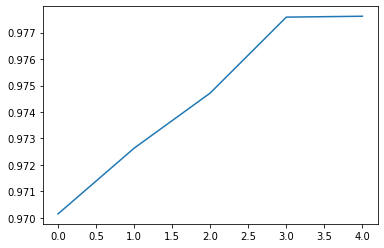

In [30]:
# 编译模型 
# 损失函数衡量模型在训练中的表现 然后进行优化
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
# 训练模型
from keras.utils.np_utils import to_categorical
history=model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5,  #要训​​练的整个数据集的迭代次数
    batch_size = 32  #每个梯度更新的样本数以进行训练

)

print(history.history.keys())
# print(plt.plot(history.history['loss']))
print(plt.plot(history.history['accuracy']))

In [34]:
# 评估模型
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9714


[0.104088194668293, 0.9714000225067139]

In [39]:
# 保存模型
# 预测前五个图片


predictions = model.predict(test_images[0:10])
# 输出模型预测 同时和标准值进行比较
print(np.argmax(predictions, axis = 1))
print(test_labels[:10 ])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


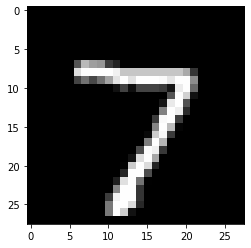

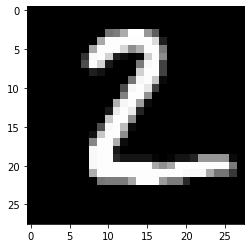

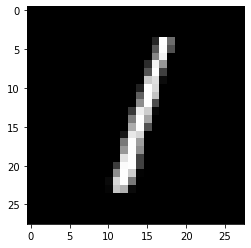

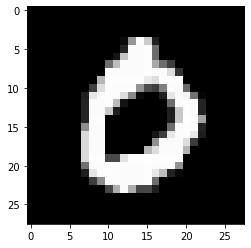

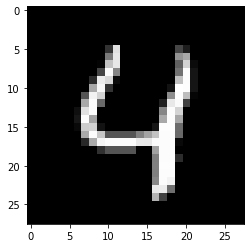

In [11]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image ,dtype= "float")
  pixels = first_image.reshape((28 ,28))
  plt.imshow(pixels , cmap="gray")
  plt.show()

In [18]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['“ASC”的副本', '.ipynb_checkpoints', 'testtensor0.ipynb']

In [40]:
from PIL import Image
import numpy as np
import os

img = Image.open("test3.jpg").convert("1")
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,784)
y_pred = model.predict(im2arr)
print(np.argmax(y_pred, axis = 1))

[8]
